# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 7
# LDA/QDA and Decision Trees

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately):

Enrollment Status (109A, 121A, 209A, or E109A):

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#import pydotplus
#import io
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline


## Multiclass Thyroid Classification

In this problem, you will build a model for diagnosing disorders in a patient's thyroid gland. Given the results of medical tests on a patient, the task is to classify the patient either as:
- *normal* (class 1)
- having *hyperthyroidism* (class 2)
- or having *hypothyroidism* (class 3). 

The data set is provided in the file `hw7_dataset.csv`. Columns 1-2 contain biomarkers for a patient (predictors):
- Biomarker 1: (Logarithm of) level of basal thyroid-stimulating hormone (TSH) as measured by radioimmuno assay
- Biomarker 2: (Logarithm of) maximal absolute difference of TSH value after injection of 200 micro grams of thyrotropin-releasing hormone as compared to the basal value.

The last column contains the diagnosis for the patient from a medical expert. This data set was obtained from the UCI machine learning repository.

Notice that unlike previous exercises, the task at hand is a 3-class classification problem. We will explore the use of different methods for multiclass classification.

First task: split the data using the following code:

In [2]:
np.random.seed(9001)
df = pd.read_csv('hw7_dataset.csv')
msk = np.random.rand(len(df)) < 0.5
data_train = df[msk]
data_test = df[~msk]

## Question 1: Fit Classification Models

1. Generate a 2D scatter plot of the training set, denoting each class with a different color. Does it appear that the data points can be separated well by a linear classifier?

2. Briefly explain the difference between multinomial logistic regression and one-vs-rest (OvR) logistic regression methods for fitting a multiclass classifier (in 2-3 sentences).

3. Fit linear classification models on the thyroid data set using both the methods.  You should use $L_2$ regularization in both cases, tuning the regularization parameter using cross-validation.  Is there a difference in the overall classification accuracy of the two methods on the training and test sets?

4. Also, compare the training and test accuracies of these models with the following classification methods:
    - Multiclass Logistic Regression with quadratic terms 
    - Linear Discriminant Analysis
    - Quadratic Discriminant Analysis
    - k-Nearest Neighbors
    <br>
*Note:* you may use either the OvR or multinomial variant for the multiclass logistic regression (with $L_2$ regularization). Do not forget to use cross-validation to choose the regularization parameter, and also the number of neighbors in k-NN. 

5. Does the inclusion of the polynomial terms in logistic regression yield better test accuracy compared to the model with only linear terms? 


*Hint:* You may use the `KNeighborsClassifier` class to fit a k-NN classification model.

C:\Users\charl\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


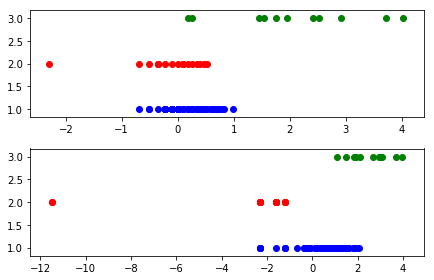

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1, axisbg="1.0")
ax2 = fig.add_subplot(2, 1, 2, axisbg="1.0")

for i, row in data_train.iterrows():
    color = ''
    if row.Diagnosis == 1.0:
        color = 'blue'
    elif row.Diagnosis == 2.0:
        color = 'red'
    elif row.Diagnosis == 3.0:
        color = 'green'
    ax1.scatter(row["Biomarker 1"], row["Diagnosis"], c=color)
    ax2.scatter(row["Biomarker 2"], row["Diagnosis"], c=color)
    
fig.tight_layout()

Does it appear that the data points can be separated well by a linear classifier? 
<br>
It does not appear that a linear classifier is appropriate for the following dataset. As the graphs show, it is noticeable that there are various points of the Biomarker 1 and Biomarker 2 that have values for class 1, meaning normal, and class 2, meaning hyperthyroidism, as well. Thus, this implies that a linear classifier would not be accurate in predicting the diagnosis for each respective Biomarker 1 and Biomarker 2.  IS THIS RIGHT? 

Briefly explain the difference between multinomial logistic regression and one-vs-rest (OvR) logistic regression methods for fitting a multiclass classifier (in 2-3 sentences).
<br>
One-vs-Rest logistic regression fits one classifier per class against all other classes. For example, if we have a dataset and we want to predict the concentration of people that are taking CS109, we would fit the model to predict people who are CS majors from statistics & other combined, then fit the model to predict statistics majors from CS & others combined, and finally fit the model to predict other majors from CS and statistics. Multinomial logistic regression instead fits a model simultaneously. TO EXPAND...

In [4]:
# splitting into x and y training and testing
x_train = data_train.loc[:, data_train.columns != 'Diagnosis']
y_train = data_train["Diagnosis"]
x_test = data_test.loc[:, data_test.columns != 'Diagnosis']
y_test = data_test['Diagnosis']

In [5]:
# One-vs-Rest model
ovr_regr = LogisticRegressionCV(random_state = 1, multi_class = 'ovr', penalty = 'l2')
ovr_regr.fit(x_train, y_train)
ovr_tr_score = ovr_regr.score(x_train, y_train)
ovr_tst_score = ovr_regr.score(x_test, y_test)
print("OvR train score: {} \nOvR test score: {} \n".format(ovr_tr_score, ovr_tst_score))

# model for multinomial logistic regression
multinom_regr = LogisticRegressionCV(random_state = 1, multi_class = 'multinomial', penalty = 'l2')
multinom_regr.fit(x_train, y_train)
multinom_tr_score = multinom_regr.score(x_train, y_train)
multinom_tst_score = multinom_regr.score(x_test, y_test)
print("Multinomial train score: {} \nMultinomial test score: {}".format(multinom_tr_score, multinom_tst_score))

# model for logistic regression with polynomial terms
multinomq_regr = LogisticRegressionCV(random_state = 1, multi_class = 'multinomial', penalty = 'l2')

OvR train score: 0.8431372549019608 
OvR test score: 0.8407079646017699 

Multinomial train score: 0.8921568627450981 
Multinomial test score: 0.8849557522123894


In [6]:
# Multiclass Logistic Regression with quadratic terms model
x_train1 = x_train.copy()
x_test1 = x_test.copy()
#creating quadtratic terms for predictors then refitting the multinomial logistic regression
poly = PolynomialFeatures(2)
x_train1 = poly.fit_transform(x_train1)
x_test1 = poly.fit_transform(x_test1)
multinomq_regr.fit(x_train1, y_train)
multinomq_tr_score = multinomq_regr.score(x_train1, y_train)
multinomq_tst_score = multinomq_regr.score(x_test1, y_test)
print("Quadratic Multinomial train score: {} \nQuadratic Multinomial test score: {}".format(multinomq_tr_score, multinomq_tst_score))

Quadratic Multinomial train score: 0.8921568627450981 
Quadratic Multinomial test score: 0.8938053097345132


In [7]:
#Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train, y_train)
lda_tr_score = lda_model.score(x_train, y_train)
lda_tst_score = lda_model.score(x_test, y_test)
print("LDA train score: {} \nLDA test score: {} \n".format(lda_tr_score, lda_tst_score))

# Quadratic Discriminant Analysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train, y_train)
qda_tr_score = qda_model.score(x_train, y_train)
qda_tst_score = qda_model.score(x_test, y_test)
print("QDA train score: {} \nQDA test score: {}".format(qda_tr_score, qda_tst_score))

LDA train score: 0.8725490196078431 
LDA test score: 0.831858407079646 

QDA train score: 0.8725490196078431 
QDA test score: 0.8495575221238938


In [8]:
#KNN with CV to determine best k
ks = [5, 10, 15, 20, 35, 40]
kscores = dict()
for i, k in enumerate(ks):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn_model, x_train, y_train)
    kscores[str(k)] = np.mean(scores)
kscores

{'10': 0.85345047109752992,
 '15': 0.81449792038027324,
 '20': 0.74552245140480444,
 '35': 0.71581359816653933,
 '40': 0.71581359816653933,
 '5': 0.87333842627960279}

In [9]:
# K-Nearest Neighbors model with k=5 given 
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train, y_train)
knn_tst_score = knn_model.score(x_test, y_test)
knn_tr_score = knn_model.score(x_train, y_train)
print("KNN train score: {} \nKNN test score: {} \n".format(knn_tr_score, knn_tst_score))

KNN train score: 0.9313725490196079 
KNN test score: 0.8849557522123894 



Does the inclusion of the polynomial terms in logistic regression yield better test accuracy compared to the model with only linear terms? 
<br>
For the multinomial logistic regression, we found a training score of 0.892 and a testing score of 0.885. Instead, for the multinomial logistic regression with polynomial terms, we reached a training score of 0.892 and a testing score of 0.894. While the training score did not improve with the inclusion of the polynomial terms, the accuracy increased slightly from 0.885 to 0.892 for the testing score. 

## Question 2: Visualize Decision Boundaries

The following code will allow you to visualize the decision boundaries of a given classification model.

**Note:** The provided code uses `sklearn`'s `PolynomialFeatures` to generate higher-order polynomial terms, with degree `poly_degree`. 
Also, if you have loaded the data sets into `pandas` data frames, you may use the `as_matrix` function to obtain a `numpy` array from the data frame objects.

1. Use the above code to visualize the decision boundaries for each of the model fitted in the previous part.
2. Comment on the difference in the decision boundaries (if any) for the OvR and multinomial logistic regression models. Is there a difference between the decision boundaries for the linear logistic regression models and LDA. What about the decision boundaries for the quadratic logistic regression and QDA? Give an explanation for your answer.

In [10]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (the classifier you want to visualize)
#      title (title for plot)
#      ax (a set of axes to plot on)
#      poly_degree (highest degree of polynomial terms included in the model; None by default)

def plot_decision_boundary(x, y, model, title, ax, poly_degree=None):
    # Create mesh
    # Interval of points for biomarker 1
    min0 = x[:,0].min()
    max0 = x[:,0].max()
    interval0 = np.arange(min0, max0, (max0-min0)/100)
    n0 = np.size(interval0)
    
    # Interval of points for biomarker 2
    min1 = x[:,1].min()
    max1 = x[:,1].max()
    interval1 = np.arange(min1, max1, (max1-min1)/100)
    n1 = np.size(interval1)

    # Create mesh grid of points
    x1, x2 = np.meshgrid(interval0, interval1)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh of points
    # Check if polynomial terms need to be included
    if(poly_degree!=None):
        # Use PolynomialFeatures to generate polynomial terms
        poly = PolynomialFeatures(poly_degree)
        xx_ = poly.fit_transform(xx)
        yy = model.predict(xx_) 
    else:   
        yy = model.predict(xx)
        
    yy = yy.reshape((n0, n1))

    # Plot decision surface
    x1 = x1.reshape(n0, n1)
    x2 = x2.reshape(n0, n1)
    ax.contourf(x1, x2, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot scatter plot of data
    yy = y.reshape(-1,)
    ax.scatter(x[yy==1,0], x[yy==1,1], c='blue', label='Normal', cmap=plt.cm.coolwarm)
    ax.scatter(x[yy==2,0], x[yy==2,1], c='cyan', label='Hyper', cmap=plt.cm.coolwarm)
    ax.scatter(x[yy==3,0], x[yy==3,1], c='red', label='Hypo', cmap=plt.cm.coolwarm)
    
    # Label axis, title
    ax.set_title(title)
    ax.set_xlabel('Biomarker 1')
    ax.set_ylabel('Biomarker 2')

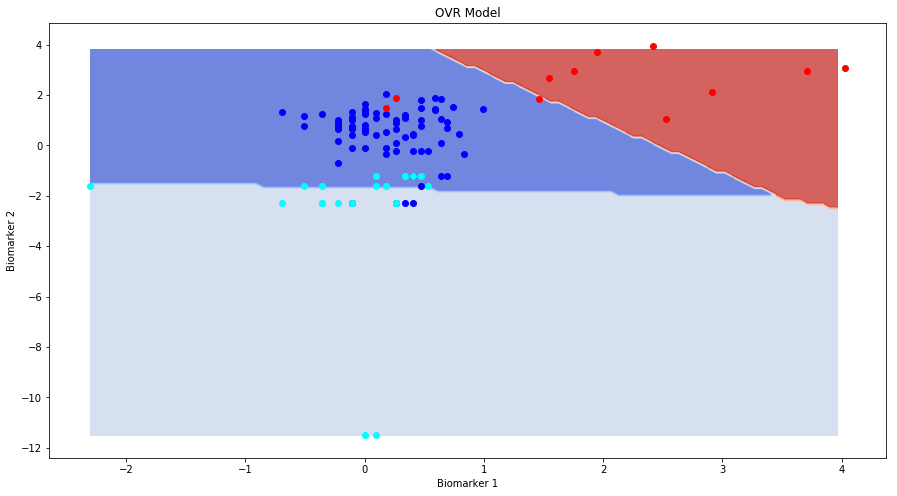

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plot_decision_boundary(x_train.values, y_train.values, ovr_regr, 'OVR Model', ax, poly_degree=None)

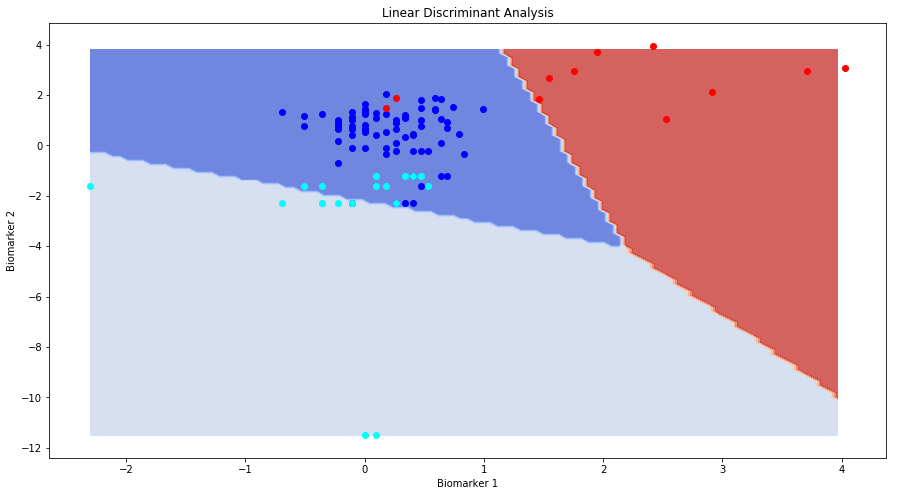

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plot_decision_boundary(x_train.values, y_train.values, lda_model, 'Linear Discriminant Analysis', ax, poly_degree=None)

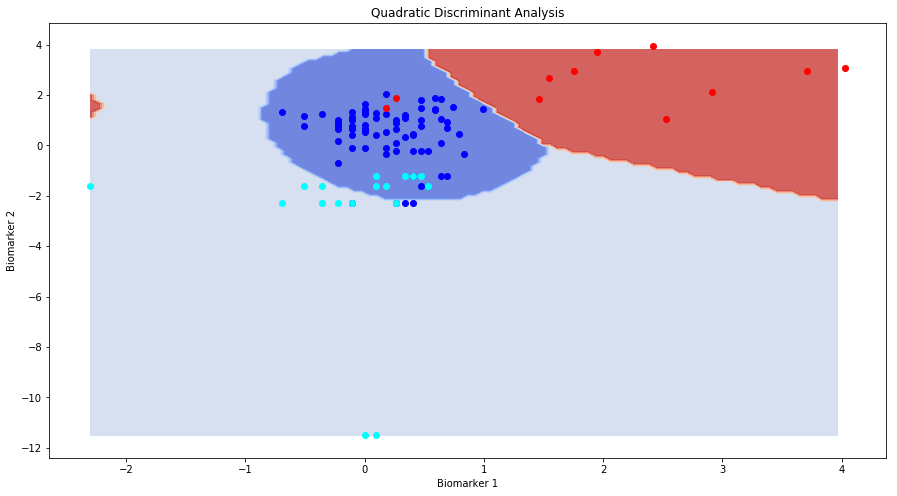

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plot_decision_boundary(x_train.values, y_train.values, qda_model, 'Quadratic Discriminant Analysis', ax, poly_degree=None)

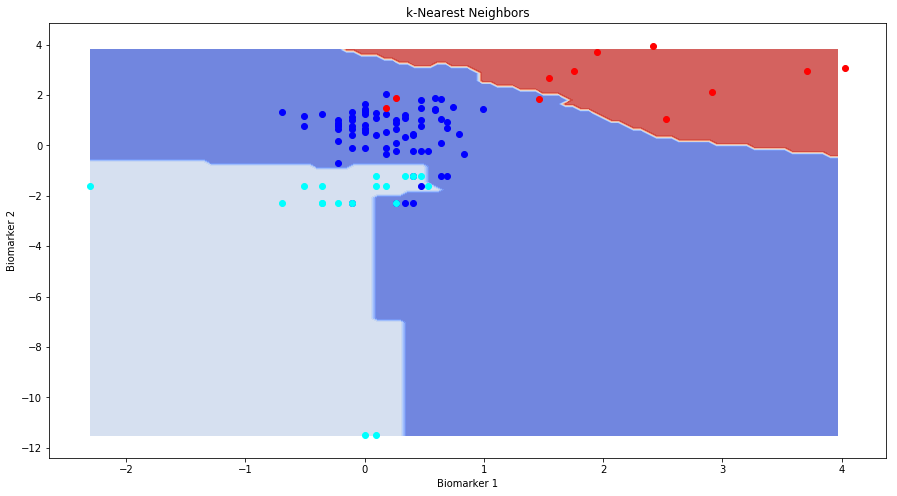

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plot_decision_boundary(x_train.values, y_train.values, knn_model, 'k-Nearest Neighbors', ax, poly_degree=None)

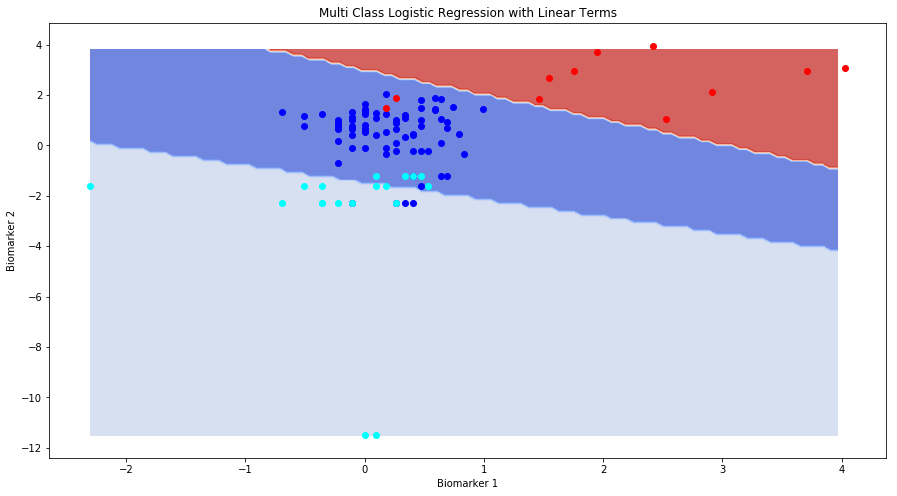

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plot_decision_boundary(x_train.values, y_train.values, multinom_regr, 'Multi Class Logistic Regression with Linear Terms', ax, poly_degree=None)

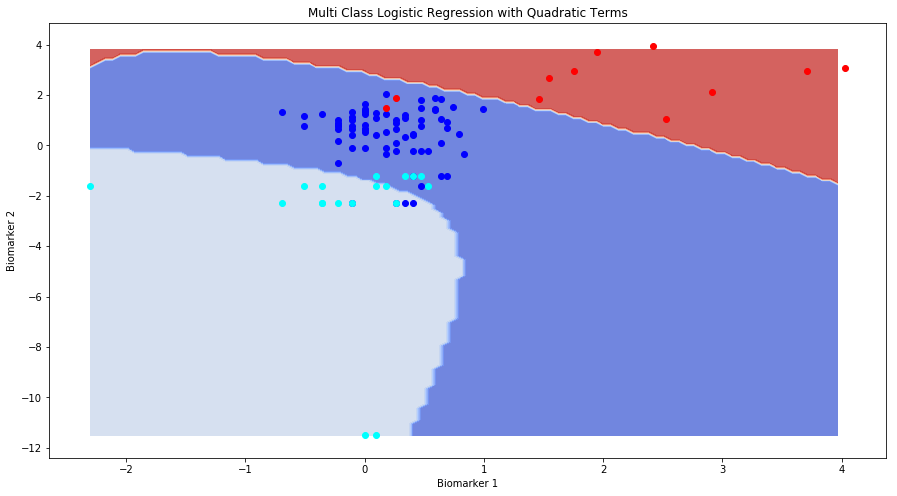

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plot_decision_boundary(x_train.values, y_train.values, multinomq_regr, 'Multi Class Logistic Regression with Quadratic Terms', ax, poly_degree=2)


Comment on the difference in the decision boundaries (if any) for the OvR and multinomial logistic regression models. Is there a difference between the decision boundaries for the linear logistic regression models and LDA. What about the decision boundaries for the quadratic logistic regression and QDA? Give an explanation for your answer.
<br>
- The multinomial logistic regression model does a much better job than the OvR model in terms of separating the three different classes close to the points where there is more than one class. 
- The linear logistic regression model and the LDA model differ greatly in their grouping of the red class, meaning the class that includes the patients that have been diagnosed with hypothyroidism. The LDA also does a poorer job in predicting the light blue spots, which refer to the hyperthyroidism class as many more are obviously grouped in the darker blue class, the normal class. 
- The quadratic logistic regression and QDA produced significantly different decision boundaries. The quadratic logistic regression associates a lot more space to the blue class, meaning the normal class, while the QDA associates much more of that same region with the light blue class, meaning the hyperthyroidism class. 

## Question 3: Fit Decision Trees

We next try out decision trees for thyroid classification. For the following questions, you may use the *Gini* index as the splitting criterion while fitting the decision tree. 
1. Fit a decision tree model to the thyroid data set with (maximum) tree depths 2, 3, ..., 10. Make plots of the training and test accuracies as a function of the tree depth. Is there a depth at which the fitted decision tree model achieves near-perfect classification on the training set? If so, what can you say about the test accuracy of this model?

2. Use 5-fold cross-validation to find the optimal tree depth. How does the performance of a decision tree fitted with this depth compare with the models fitted in Part 2(a)?

3. Use the code provided in Part 2(c) to visualize the decision boundary of the fitted decision tree. How is the decision boundary of the decision tree model different from the other methods? Given an explanation for your observation.

4. Use the `export_graphviz` function in `sklearn` to generate a visualization of the tree diagram for the fitted model. Based on the visualization, explain *in words* how the fitted model diagnoses 'hypothyroidism' for a patient.  


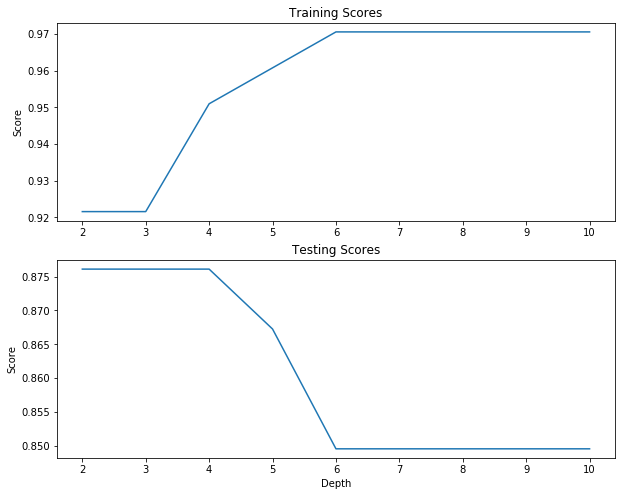

In [17]:
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores = dict()
test_scores = dict()
for depth in depths:
    tree_model = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    tree_model.fit(x_train, y_train)
    test_scores[depth] = tree_model.score(x_test, y_test)
    train_scores[depth] = tree_model.score(x_train, y_train)
x, y = zip(*(train_scores.items()))
x1, y1 = zip(*(test_scores.items()))

# Creating the plots for training and testing
fig = plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(x, y)
plt.ylabel("Score")
plt.title("Training Scores")
plt.subplot(212)
plt.plot(x1, y1)
plt.ylabel("Score")
plt.title("Testing Scores")
plt.xlabel("Depth")
fig.tight_layout;

Is there a depth at which the fitted decision tree model achieves near-perfect classification on the training set? If so, what can you say about the test accuracy of this model? 
<br>
On the training set, the decision tree model achieves near-perfect classification when the depth is above 6. On those same depths, the testing score achieves its lowest results.

In [18]:
# 5-fold cross validation to find optimal tree depth
tree_scores = dict()
for i, depth in enumerate(depths):
    tree_model = DecisionTreeClassifier(max_depth = depth, random_state = 1)
    tree_model.fit(x_train, y_train)
    scores = cross_val_score(tree_model, x_test, y_test)
    tree_scores[str(depth)] = np.mean(scores)
tree_scores

{'10': 0.84098065677013045,
 '2': 0.85739991003148897,
 '3': 0.83127155495576555,
 '4': 0.79708352076773126,
 '5': 0.81391512970460334,
 '6': 0.83292097765781981,
 '7': 0.84098065677013045,
 '8': 0.84098065677013045,
 '9': 0.84098065677013045}

How does the performance of the decision tree fitted with this depth compare with the models fitted in Part 2a? 
<br>
Compared to the results found with the k-neighrest neighbour model, the decision tree model seems to have an overall higher score and a much more consistent score. 

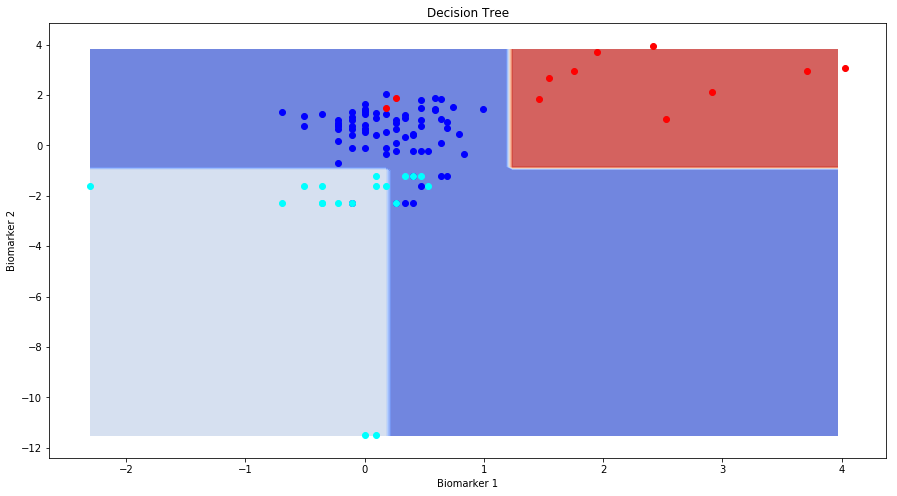

In [19]:
tree_model = DecisionTreeClassifier(max_depth = 2, random_state = 1)
tree_model.fit(x_train, y_train)
fig, ax = plt.subplots(1, 1, figsize=(15,8))
plot_decision_boundary(x_train.values, y_train.values, tree_model, 'Decision Tree', ax, poly_degree=None)

How is the decision boundary of the decision tree model different from the other methods?
<br>
Compared to the decision boundaries from the previous models, the decision boundary of the tree model has a significantly distict arrangement for the colors of the designated classes. Compared to many, this model has a large amount of space that is layed out to predict the blue class, meaning the class of patients with normal health. 

In [20]:
export_graphviz(tree_model, max_depth=2, out_file="tree.dot")

Based on the visualization, explain in words how the fitted model diagnoses 'hypothyroidism' for a patient.
<br>
The Decision Tree Classifier first assesses the value of Biomarker 2 for each patient. If the value of Biomarker 2 is less than -0.9485 then it rules out hypothyroidism for a given patient. However, if Biomarker 2 is greater than -0.9485 then it considers the value of Biomarker 1. If the value of Biomarker 1 is greater than 1.2259 then the classifier diagnoses the patient with hypothyroidism. 

*Note:* Look at the `export_graphviz` function in the `sklearn.tree` module. 

You can get a graphic for this visualization by pasting the generated graphviz file in the text box at http://www.webgraphviz.com/ , or you can do it on your own computer.

If you choose the do the latter, you will have to install `GraphViz` and `pydot` to use the decision tree rendering code. For this, you may execute the following commands in a terminal:

`$pip install graphviz`<br>
`$pip install pydot`

*Hint:* You may use the `DecisionTreeClassifier` class to fit a decision tree classifier and the `max_depth` attribute to set the tree depth. You may use the `cross_val_score` function for cross-validation with decision trees.

## Question 4: Too many models to choose from!

We have so far seen six different ways of fitting a classification model for thyroid classification problem: **linear logistic regression**, **logistic regression with polynomial terms**, **LDA**, **QDA**, **k-NN** and **decision tree**. Which of these methods should one use in practice? To answer this question, we now look at the pros and cons of each method.

1. Compare and contrast the six models based on each of the following criteria (a supporting table to summarize your  thoughts can be helpful):
  - Classification performance
  - Complexity of decision boundary
  - Memory storage
  - Ease of interpretability

2. If you were a clinician who had to use the classifier to diagnose thyroid disorders in patients, which among the six methods would you be most comfortable in using? 

|                                          	| Linear Logistic Regression                                                                                                        	| Logistic Regression With Polynomial Terms                                                                     	| LDA                                                                                                                                        	| QDA                                                                                                    	| KNN                                             	| Decision Tree                                          	|
|------------------------------------------	|-----------------------------------------------------------------------------------------------------------------------------------	|---------------------------------------------------------------------------------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------------------	|--------------------------------------------------------------------------------------------------------	|-------------------------------------------------	|--------------------------------------------------------	|
| Classification Performance (train, test) 	| (0.892, 0.885)                                                                                                                    	| (0.892, 0.894)                                                                                                	| (0.873, 0.832)                                                                                                                             	| (0.873, 0.850)                                                                                         	| (0.931, 0.885)                                  	| (0.922, 0.857)                                         	|
| Complexity of Decision Boundary          	| Simple decision boundaries that could be represented with simple linear equations                                                 	| Moderately complex decision boundaries that could be represented by quadratic equations                       	| Simple boundaries that could be represented by linear equations                                                                            	| Moderately complex decision boundaries that could be represented by quadratic equations                	| Very Complex                                    	| Clear, simple boundaries that are easily interpretable 	|
| Memory Storage                           	| This model requires relatively low memory, because it has few parameters.                                                         	| This model has more parameters than the linear logistic regression, but still does not require much memory.   	| This model does not require much memory as it only has to store coefficients.                                                              	| This model has to store more coefficients than the LDA, but still it does not have to store very many. 	| A lot of memory needed.                         	| Negligible memory needed after fit.                    	|
| Ease of Interpretability                 	| Easy to interpret, because the values of the coefficients give us a sense of how certain predictors effect the dependent variable 	| Harder to interpret, because it is hard to understand the significance of the quadratic and interaction terms 	| Hard to interpret, because although the boundaries can be helpful, they do not tell us how each predictor effects the outcome of the model 	| Harder to interpret than LDA, because the boundaries are even more complicated.                        	| Effectively useless for interpreting the model. 	| Very easy to interpret                                 	|

I would be the most comfortable with the decision tree, because it is very easy to interpret this model. This means that it would be easier for me to recognize how certain biomarkers effect a patient's chance of having either hypothyroidism or hyperthyroidism. Also, because this model is so clear I would be able to more easily recognize its weaknesses, which would allow me to use it more effectively, because I'd know when it is more likely to make a mistake.

## Question 5: Including an 'abstain' option

One of the reasons a hospital might be hesitant to use your thyroid classification model is that a misdiagnosis by the model on a patient can sometimes prove to be very costly (e.g. if the patient were to file a law suit seeking a compensation for damages). One way to mitigate this concern is to allow the model to 'abstain' from making a prediction, whenever it is uncertain about the diagnosis for a patient. However, when the model abstains from making a prediction, the hospital will have to forward the patient to a thyroid specialist (i.e. an endocrinologist), which would incur additional cost. How does one design a thyroid classification model with an abstain option, such that the cost to the hospital is minimized?

1. More specifically, suppose the cost incurred by a hospital when a model mis-predicts on a patient is \$5000, and the cost incurred when the model abstains from making a prediction is \$1000. What is the average cost per patient for the OvR logistic regression model from Question 1, Part 3? Note that this needs to be evaluated on the patients in the test set. Your task is to design a classification strategy (into the 3 groups plus the *abstain* group) that has as low cost as possible per patient.   Give a justification for your approach.

2. **Presentation:** Prepare a set of 5 slides explaining your approach to the hospital management. Your presentation must be accessible to the lay man. Explain in particular how your approach would be robust to changes in the costs of using the abstain option.

*Hint:* think of a way to use the estimated probabilities from the logistic regression model to decide who to classify as *abstain*.

In [22]:
#Find the threshold for the max probability that improves the score when that threshold is used
score = ovr_regr.score(x_test, y_test)
probabilities = ovr_regr.predict_proba(x_test)
thresholds = np.arange(0, 1, 0.05)
new_ts = []
for t in thresholds:
    abstain = []
    for i, probability in enumerate(probabilities):
        if np.max(probability) <= t:
            abstain.append(i - 1)

    nx_test = x_test.drop(x_test.index[abstain])
    ny_test = y_test.drop(y_test.index[abstain])
    nscore = ovr_regr.score(nx_test, ny_test)
    
    if nscore > score:
        new_ts.append(t)
        print("New {} vs. Old {} at Threshold: {}".format(nscore, score, t))

New 0.8411214953271028 vs. Old 0.8407079646017699 at Threshold: 0.55
New 0.8526315789473684 vs. Old 0.8407079646017699 at Threshold: 0.6000000000000001
New 0.8522727272727273 vs. Old 0.8407079646017699 at Threshold: 0.65
New 0.8674698795180723 vs. Old 0.8407079646017699 at Threshold: 0.7000000000000001
New 0.8734177215189873 vs. Old 0.8407079646017699 at Threshold: 0.75
New 0.881578947368421 vs. Old 0.8407079646017699 at Threshold: 0.8
New 0.8769230769230769 vs. Old 0.8407079646017699 at Threshold: 0.8500000000000001
New 0.875 vs. Old 0.8407079646017699 at Threshold: 0.9
New 0.8709677419354839 vs. Old 0.8407079646017699 at Threshold: 0.9500000000000001


Threshold: 0.5 Cost: 796.4601769911504
Threshold: 0.55 Cost: 628.3185840707964
Threshold: 0.6000000000000001 Cost: 557.5221238938053
Threshold: 0.6500000000000001 Cost: 575.2212389380531
Threshold: 0.7000000000000002 Cost: 575.2212389380531
Threshold: 0.7500000000000002 Cost: 610.6194690265487
Threshold: 0.8000000000000003 Cost: 637.1681415929204
Threshold: 0.8500000000000003 Cost: 646.0176991150443
Threshold: 0.9000000000000004 Cost: 637.1681415929204
Threshold: 0.9500000000000004 Cost: 814.1592920353983


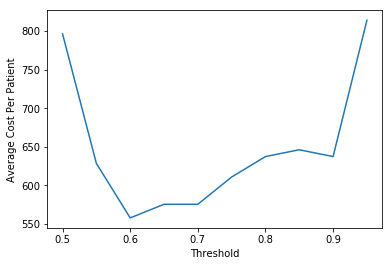

In [34]:
#from the above test we know that abstaining improves our classification accuracy when the threshold is in the range (0.55, 1)
#Now we need to find which of those thresholds also decreases our cost per patient
def total_cost(threshold):
    y_pred = ovr_regr.predict(x_test)
    predictions = []
    count = 0
    for y, probability in zip(y_test, probabilities):
        if np.max(probability) <= threshold:
            predictions.append(0)
            count += 1
        elif y == y_pred[count]:
            predictions.append(1)
            count += 1
        else:
            predictions.append(2)
            count += 1
    correct = predictions.count(1)
    abstain = predictions.count(0)
    wrong = predictions.count(2)
    cost = (((wrong*5000) + (abstain*1000))/(len(predictions)))
    return cost

ts = np.arange(0.5, 1, 0.05)
costs = []
for t in ts:
    print("Threshold: {} Cost: {}".format(t, total_cost(t)))
    costs.append(total_cost(t))
plt.plot(ts, costs)
plt.xlabel("Threshold")
plt.ylabel("Average Cost Per Patient")

We created a function that calculated the cost per patient depending upon the given threshold. That threshold is how high the maximum of the three probabilities predicted by our OvR must be or else we will abstain. We then iterated over many different possible thresholds to find the least expensive threshold possible.